In [1]:
import pickle
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

C:\Users\djaym7\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
address='D:\\data_mfcc\\'

In [3]:
def loadData(id):
    with open(address + f'y_train_{id}','rb') as f:
        y_train=np.array(pickle.load(f))
    with open(address+f'y_test_{id}','rb') as f:
        y_test=np.array(pickle.load(f))
    with open(address+ f'X_train_{id}','rb') as f:
        X_train = np.array(pickle.load(f))
    with open(address+f'X_test_{id}','rb') as f:
        X_test = np.array(pickle.load(f))

    scalers = {}
    for k in range(X_train.shape[2]):
        scalers[k] = StandardScaler()
        X_train[:, k, :] = scalers[k].fit_transform(X_train[:, k, :]) 

    for j in range(X_test.shape[2]):
        X_test[:, j, :] = scalers[j].transform(X_test[:, j, :])
    
    print(f'id : {id}')
    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.fit_transform(y_test)

   
    return X_test,y_test



In [4]:
def result(y_pred,y_test,plot=False):
    y_pred_final=[] #getting final answers 
    y_test_final=[]
    for i in range((y_pred.shape[0])):
        y_pred_final.append(np.argmax(y_pred[i]))
        y_test_final.append(np.argmax(y_test[i]))

    y_pred_final_alpha=[]
    y_test_final_alpha=[]


    conf_Mat = confusion_matrix(y_test_final,y_pred_final,labels=[0,1,2,3,4,5])
    norm_conf_Mat = (conf_Mat / conf_Mat.astype(np.float).sum(axis=1))*100
    accuracy = accuracy_score(y_test_final,y_pred_final)
    
    #plot confusion matrix
    #plt.subplot(1,2,1)

    if plot == True:
        norm_df_cm = pd.DataFrame(norm_conf_Mat, index = ['ANG','DIS','FEA','HAP','NEU','SAD'],
                  columns = ['ANG','DIS','FEA','HAP','NEU','SAD'])
        df_cm = pd.DataFrame(conf_Mat, index = ['ANG','DIS','FEA','HAP','NEU','SAD'],
                  columns = ['ANG','DIS','FEA','HAP','NEU','SAD'])
        
    return accuracy,norm_df_cm,df_cm

In [5]:
def plot(df_cm1,df_cm2,id,accuracy_att,accuracy):
    fig, (ax1,ax2) =plt.subplots(1,2,figsize=(20,5))
    #ax.set_title(id)
    ax1.set_title(f'Attention {id} - accuracy - {accuracy_att*100:.2f}')
    ax2.set_title(f'Regular {id} - accuracy - {accuracy*100:.2f}')
    sn.heatmap(df_cm1, annot=True,ax=ax1,fmt='g')
    sn.heatmap(df_cm2, annot=True,ax=ax2,fmt='g')

    

In [20]:
# edit the address to local dir for attention models from fourthmodel.py variable filepath

def AttentionModel(X_test,y_test,id):
    s0_t = np.zeros((X_test.shape[0], hid_post_act))
    c0_t = np.zeros((X_test.shape[0], hid_post_act))
    model = keras.models.load_model(r"C:\Users\djaym7\Desktop\Github\EmotionRecognition\saved_mfcc_models"+f'/{id}.h5')
    return result(model.predict([X_test,s0_t,c0_t]),y_test,plot=True)
    

In [7]:
# edit the address to local dir for attention models from fourthmodel-NA variable filepath

def NonAttentionModel(X_test,y_test,id):
    model = keras.models.load_model(r"C:\Users\djaym7\Desktop\Github\EmotionRecognition\saved_mfcc_models"+f'/NA{id}.h5')
    return result(model.predict(X_test),y_test,plot=True)

In [8]:
total_num_people=[]
for i in range(1,92):
    if i <10:
        total_num_people.append('100'+str(i))
    else:
        total_num_people.append('10'+str(i))
hid_post_act = 96
att_acc=[]
acc=[]
att_df_list=[]
df_list=[]
for i in total_num_people:
    
    X_test,y_test=loadData(i)
    accuracy_att,norm_df_cm1,df_cm1 = AttentionModel(X_test,y_test,i)
    #accuracy,norm_df_cm2,df_cm2= NonAttentionModel(X_test,y_test,i)
    att_df_list.append(df_cm1)
    #df_list.append(df_cm2)
    #att_acc.append(accuracy_att)
    #acc.append(accuracy)
    #plot(norm_df_cm1,norm_df_cm2,i,accuracy_att,accuracy)
    
    #change the address where you would like to save all images or delete the code below if you dont want image output
    #plt.savefig(r"C:\Users\djaym7\Desktop\Github\EmotionRecognition\confusion_matrices\ " + f'{i}.png')
    plt.close('all')
    break

id : 1001


In [26]:
accuracy_att,norm_df_cm1,df_cm1 = AttentionModel(X_test,y_test,1042)

0.5487804878048781


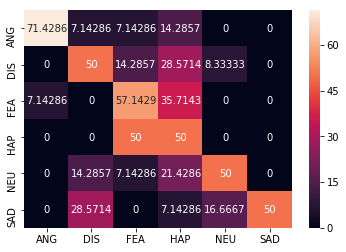

In [27]:
print(accuracy_att)
sn.heatmap(norm_df_cm1, annot=True,fmt='g')

In [ ]:
df_att = pd.DataFrame().reindex_like(att_df_list[0])
for i in att_df_list:
    df_att=df_att.add(i,fill_value=0)

In [ ]:
df = pd.DataFrame().reindex_like(att_df_list[0])
for i in df_list:
    df=df.add(i,fill_value=0)

In [ ]:
mean_att_acc = np.array(att_acc).mean()
mean_acc = np.array(acc).mean()

In [ ]:
print(mean_att_acc,'\t',mean_acc)

In [ ]:
df_att = (df_att / df_att.astype(np.float).sum(axis=1))*100
df = (df / df.astype(np.float).sum(axis=1))*100
plot(df_att,df,id='aLL',accuracy=mean_acc,accuracy_att=mean_att_acc)
plt.savefig(f'all.png')

In [ ]:
accuracy = pd.DataFrame(np.array([att_acc,acc]).transpose())

In [ ]:
accuracy.plot(figsize=(25,5),fontsize=15,kind='bar')
plt.savefig('accuracyBarPlot.png')

In [ ]:
accuracy.plot(figsize=(25,5),fontsize=15)
plt.savefig('accuracyPlot.png')